In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

from collections import Counter
from ast import literal_eval
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("pokemon.csv")
print(data.shape)
data.head()

(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [4]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [5]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [6]:
data['type2'].fillna('None', inplace = True)
data['percentage_male'].fillna('None', inplace = True)

data['height_m'].fillna(data['height_m'].mean(), inplace = True)
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace = True)

In [7]:
data.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [8]:
data.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 
data.insert(0, 'name' , data.pop('name'))
data['total_ability'] = data.apply(lambda x : len(literal_eval(x['abilities'])), axis = 1)
data['combined_type'] = data.apply(lambda x : x['type1'] + '_' + x['type2'], axis = 1)
data = data.rename(columns = {'type1' : 'primary_type', 'type2' : 'secondary_type'})  
data.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,sp_attack,sp_defense,speed,primary_type,secondary_type,weight_kg,generation,is_legendary,total_ability,combined_type
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,65,65,45,grass,poison,6.9,1,0,2,grass_poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,80,80,60,grass,poison,13.0,1,0,2,grass_poison
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,122,120,80,grass,poison,100.0,1,0,2,grass_poison
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,60,50,65,fire,None,8.5,1,0,2,fire_None
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,80,65,80,fire,None,19.0,1,0,2,fire_None


In [9]:
for i in data.capture_rate:
    print(i,end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

In [10]:
data[data['capture_rate'] == '30 (Meteorite)255 (Core)'].T

,773
name,Minior
abilities,['Shields Down']
against_bug,0.5
against_dark,1.0
against_dragon,1.0
against_electric,2.0
against_fairy,1.0
against_fight,1.0
against_fire,0.5
against_flying,0.5


In [11]:
data["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
data['capture_rate'] = data['capture_rate'].astype('int')
data['capture_rate'].dtype

dtype('int64')

In [12]:
data[data['name'] == 'Minior'].T

,773
name,Minior
abilities,['Shields Down']
against_bug,0.5
against_dark,1.0
against_dragon,1.0
against_electric,2.0
against_fairy,1.0
against_fight,1.0
against_fire,0.5
against_flying,0.5


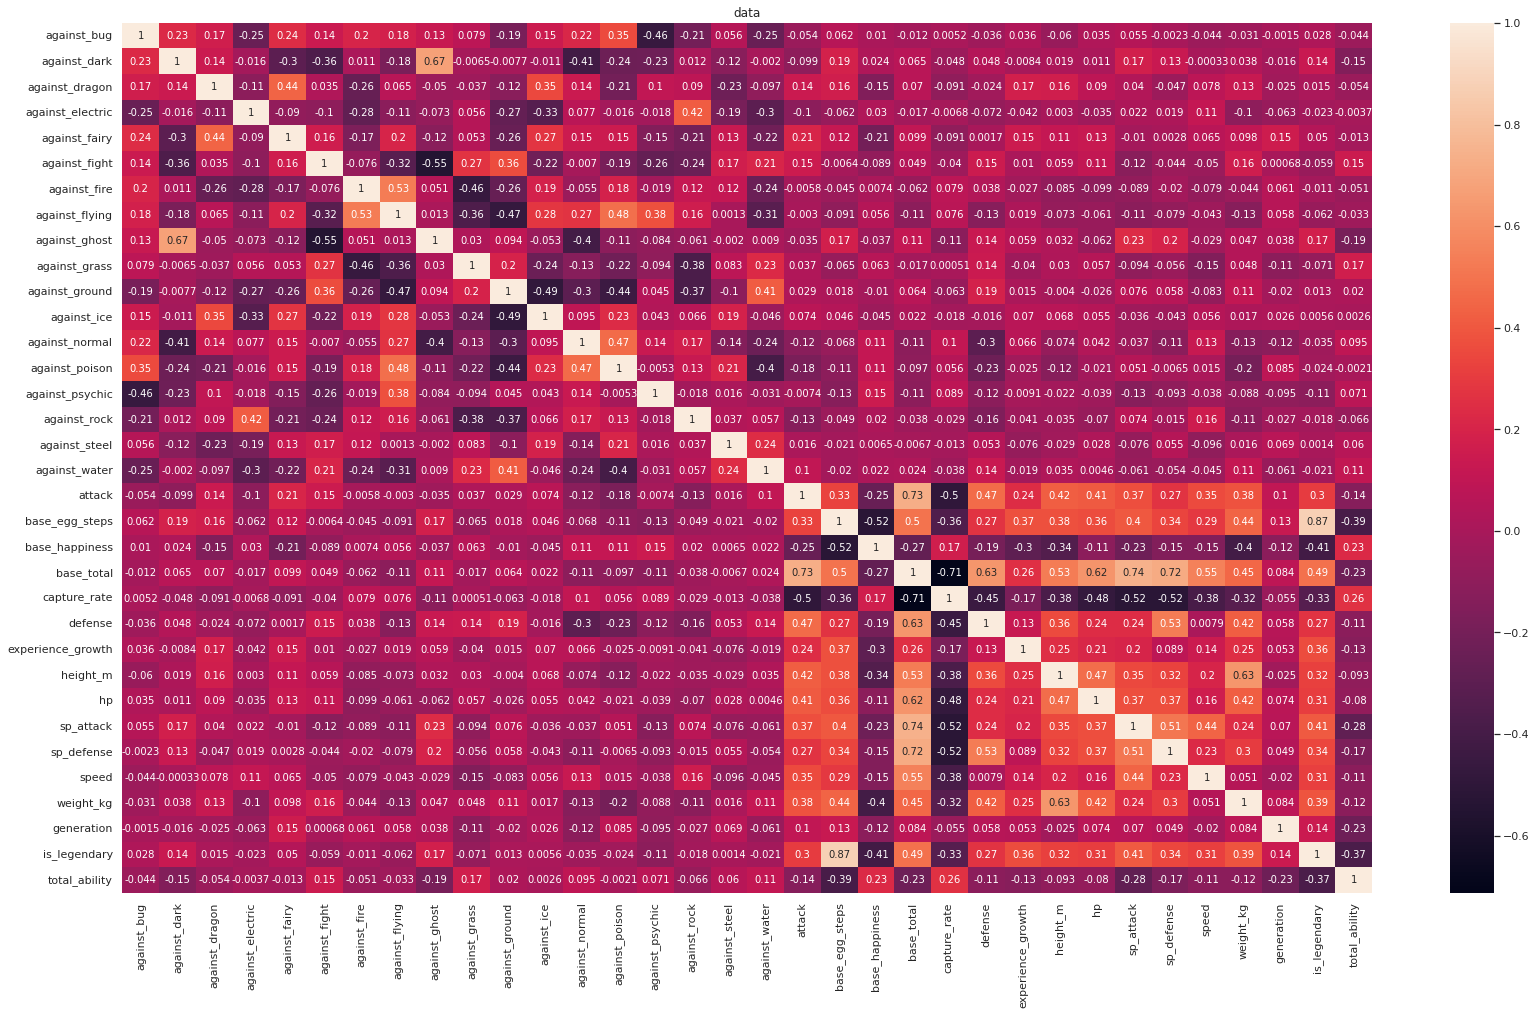

In [13]:
fig,axes = plt.subplots(figsize=(28,16))
sns.heatmap(data.corr(), annot = True).set_title('data')
plt.show()

In [14]:
against = []
rest = []
for i in data.columns.tolist():
    if 'against' in i:
        against += [i]
    else:
        rest += [i]

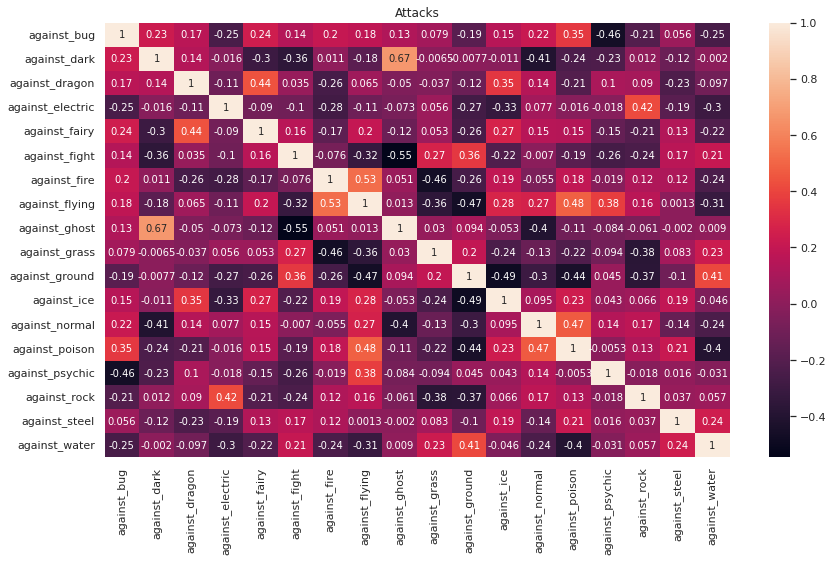

In [15]:
fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[against].corr(), annot = True).set_title('Attacks')
plt.show()

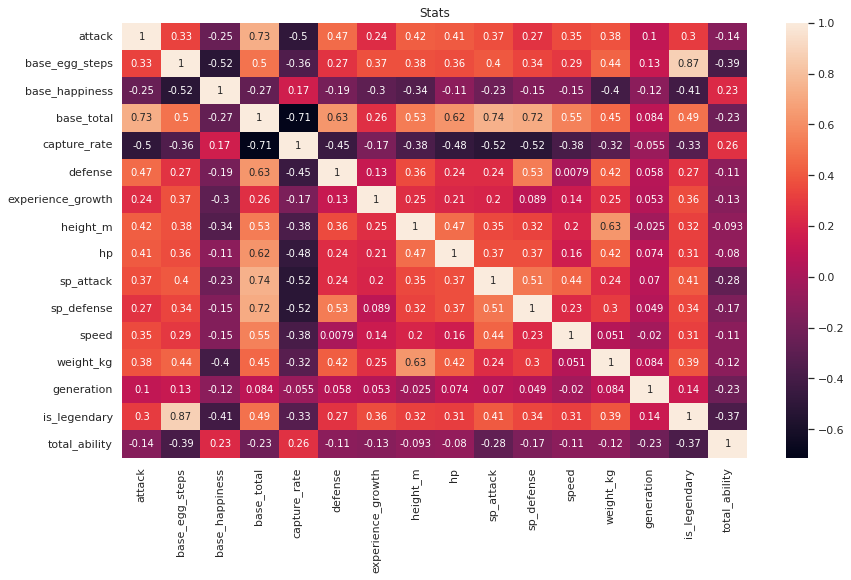

In [16]:
fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[rest].corr(), annot = True).set_title('Stats')
plt.show()

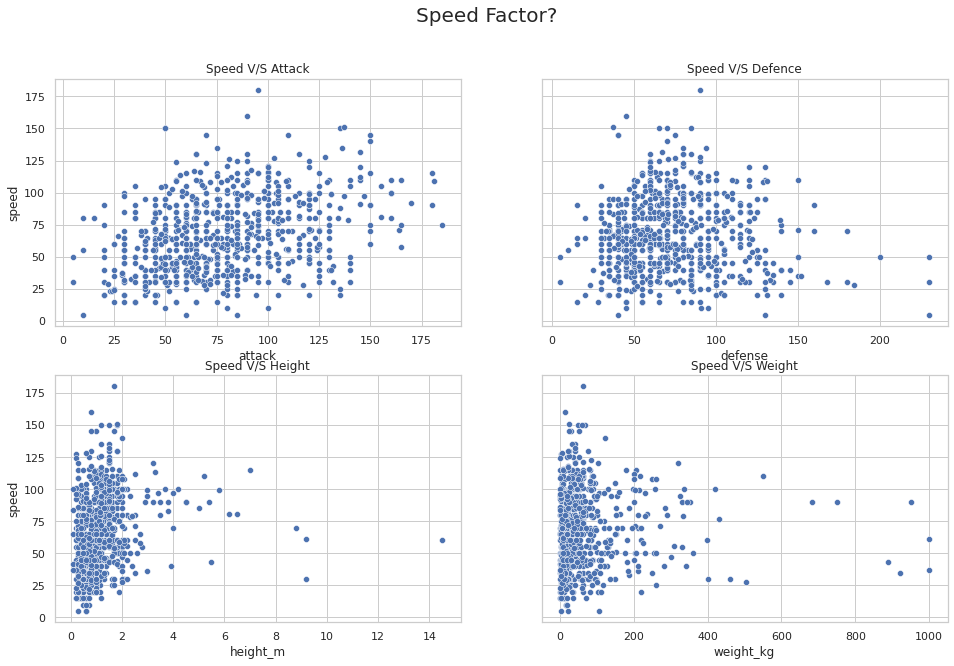

In [17]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)

sns.scatterplot(x = data['attack'],y = data['speed'],ax=axes[0,0])
axes[0,0].set_title("Speed V/S Attack")

sns.scatterplot(x = data['defense'],y = data['speed'],ax=axes[0,1])
axes[0,1].set_title("Speed V/S Defence")

sns.scatterplot(x = data['height_m'],y = data['speed'],ax=axes[1,0])
axes[1,0].set_title("Speed V/S Height")

sns.scatterplot(x = data['weight_kg'],y = data['speed'],ax=axes[1,1])
axes[1,1].set_title("Speed V/S Weight")

fig.suptitle("Speed Factor?", size=20)

plt.show()

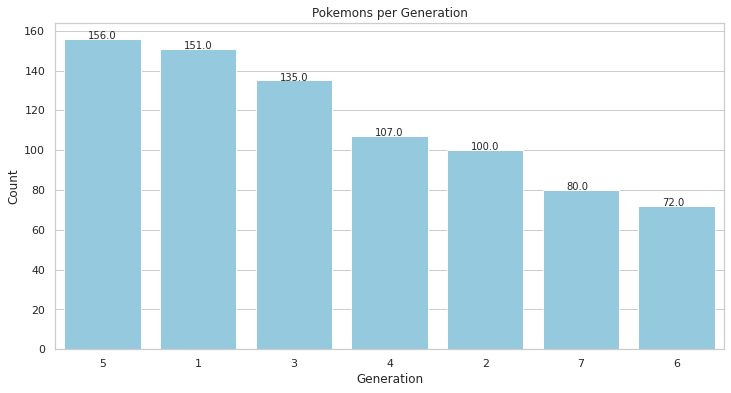

In [18]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [19]:
primary_type_generation_group = data.groupby(['generation', 'primary_type'])['name'].count().to_frame().reset_index()
secondary_type_generation_group = data.groupby(['generation', 'secondary_type'])['name'].count().to_frame().reset_index()
primary_type_generation_group.head(20)

,generation,primary_type,name
0,1,bug,12
1,1,dragon,3
2,1,electric,9
3,1,fairy,2
4,1,fighting,7
5,1,fire,12
6,1,ghost,3
7,1,grass,12
8,1,ground,8
9,1,ice,2


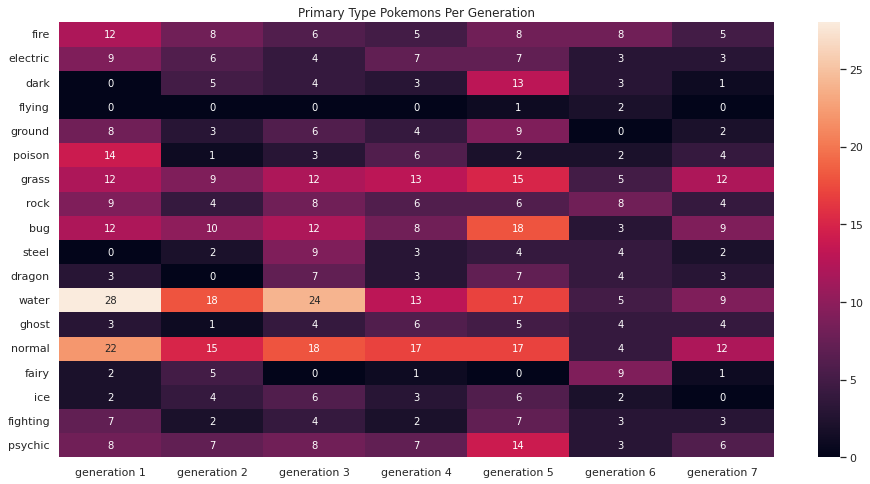

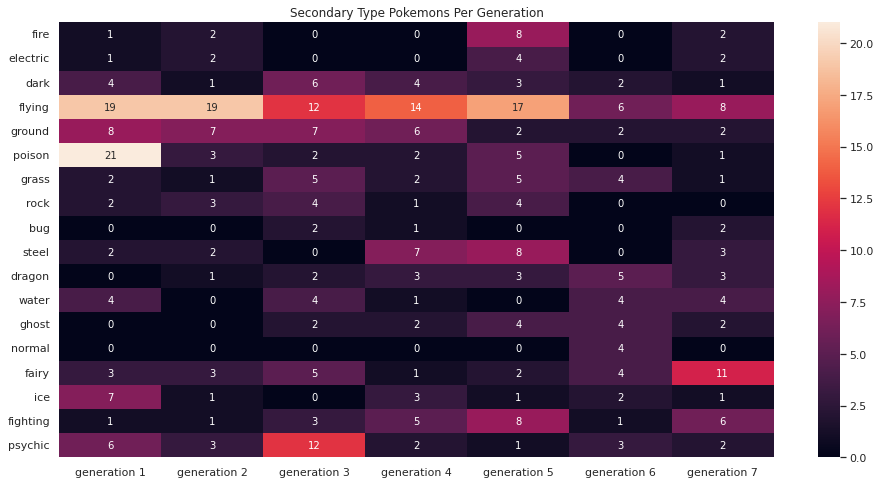

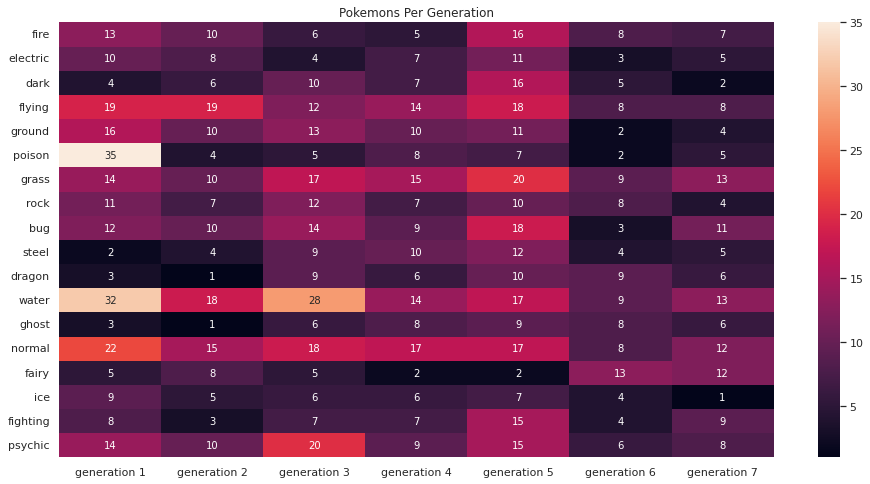

In [20]:
primary_type_generation_dict  = {}
unique_primary_type = list(primary_type_generation_group['primary_type'].unique())

secondary_type_generation_dict  = {}
unique_secondary_type = list(secondary_type_generation_group['secondary_type'].unique())
unique_secondary_type.remove('None')

type_generation_dict = {}
unique_type = list(set(unique_primary_type + unique_secondary_type))

for generation in list(primary_type_generation_group['generation'].unique()):
    current_primary_type_generation = [] 
    current_secondary_type_generation = []
    
    for p_type in unique_type:
        try:
            current_primary_type_generation.append(primary_type_generation_group.loc[(primary_type_generation_group['generation'] == generation) 
                                        & (primary_type_generatison_group['primary_type'] == p_type)]['name'].values[0])
        except IndexError:
            current_primary_type_generation.append(0)

        try:
            current_secondary_type_generation.append(secondary_type_generation_group.loc[(secondary_type_generation_group['generation'] == generation) 
                                        & (secondary_type_generation_group['secondary_type'] == p_type)]['name'].values[0])
        except IndexError:
            current_secondary_type_generation.append(0)
    
    primary_type_generation_dict[f'generation {generation}'] = current_primary_type_generation
    secondary_type_generation_dict[f'generation {generation}'] = current_secondary_type_generation
    
    type_generation_dict[f'generation {generation}'] = np.array(current_primary_type_generation) + np.array(current_secondary_type_generation)    

p_primary_type_by_generation = pd.DataFrame(primary_type_generation_dict, index = unique_type)
p_secondary_type_by_generation = pd.DataFrame(secondary_type_generation_dict, index = unique_type)
p_type_by_generation = pd.DataFrame(type_generation_dict, index = unique_type)

fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_primary_type_by_generation,annot=True).set_title('Primary Type Pokemons Per Generation')

fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_secondary_type_by_generation,annot=True).set_title('Secondary Type Pokemons Per Generation')

fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_type_by_generation,annot=True).set_title('Pokemons Per Generation')

plt.show()

<AxesSubplot:>

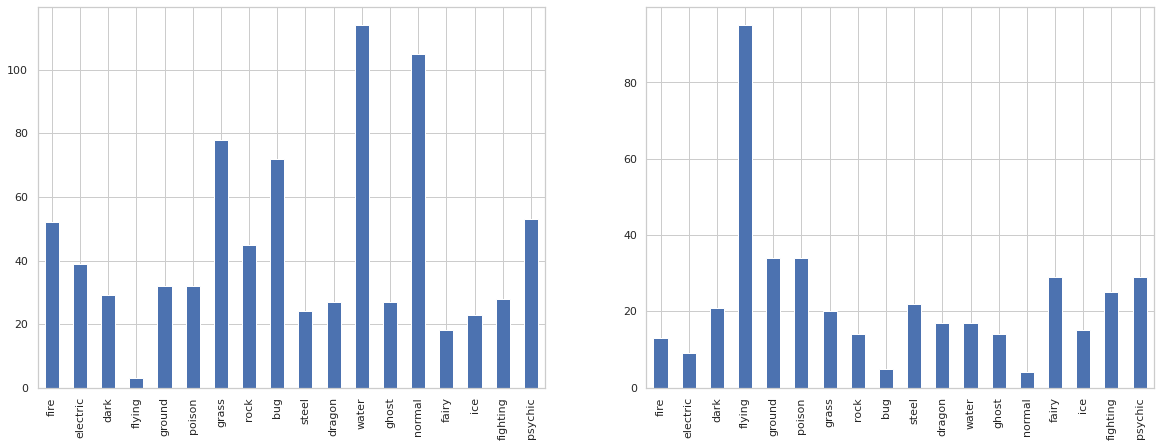

In [21]:
f, axes = plt.subplots(1,2,figsize=(20,7))

primary_type_count = p_primary_type_by_generation.sum(axis = 1)
primary_type_count.plot.bar(ax = axes[0])

secondary_type_count = p_secondary_type_by_generation.sum(axis = 1)
secondary_type_count.plot.bar(ax = axes[1])

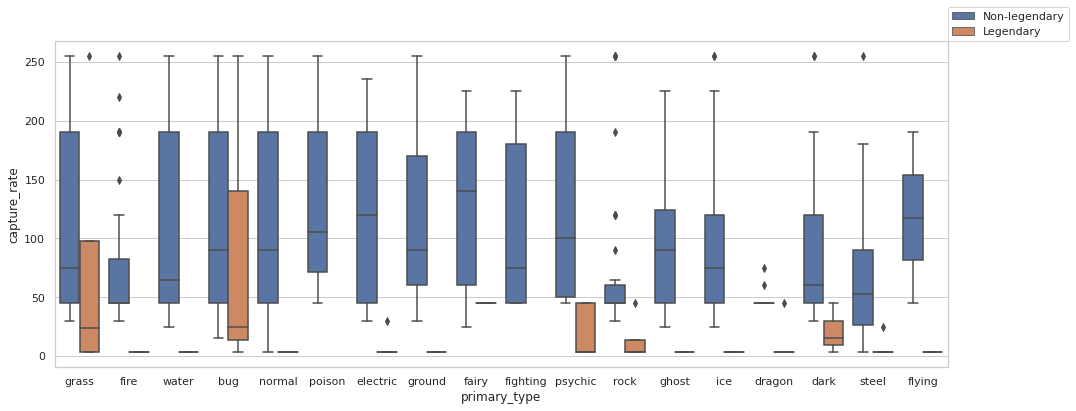

In [22]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='primary_type',y='capture_rate', hue='is_legendary', data = data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

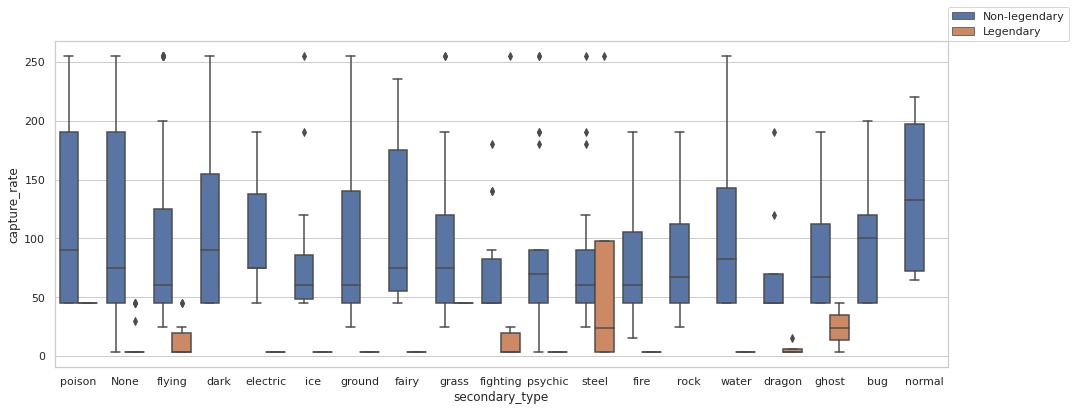

In [23]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='secondary_type',y='capture_rate', hue='is_legendary', data = data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

In [24]:
legend = data[data['is_legendary'] == 1][['name','combined_type','primary_type','secondary_type']]
legend.head()

,name,combined_type,primary_type,secondary_type
143,Articuno,ice_flying,ice,flying
144,Zapdos,electric_flying,electric,flying
145,Moltres,fire_flying,fire,flying
149,Mewtwo,psychic_None,psychic,None
150,Mew,psychic_None,psychic,None


In [25]:
sec_type = []
secondary = legend['secondary_type']
for i in secondary:
    if 'None' in i: 
        pass
    else:
        sec_type.append(i)
count_sec_type = Counter(sec_type) 

comb_type = []
combined = legend['combined_type']
for i in combined:
    if 'None' in i: 
        pass
    else:
        comb_type.append(i)
count_comb_type = Counter(comb_type)

count_sec_type = sorted(count_sec_type.items(), key=lambda x: x[1],reverse=True)
count_comb_type = sorted(count_comb_type.items(), key=lambda x: x[1],reverse=True)

In [26]:
count_sec_type

[('flying', 10),
 ('fighting', 6),
 ('fairy', 6),
 ('psychic', 4),
 ('dragon', 4),
 ('steel', 4),
 ('grass', 2),
 ('fire', 2),
 ('ghost', 2),
 ('electric', 1),
 ('ice', 1),
 ('ground', 1),
 ('water', 1),
 ('poison', 1)]

In [27]:
keys_sec_type, keys_comb_type, values_sec_type, values_comb_type = [], [], [], []

for i in count_sec_type:
    keys_sec_type.append(i[0])
    values_sec_type.append(i[1])
    
for i in count_comb_type:
    keys_comb_type.append(i[0])
    values_comb_type.append(i[1])

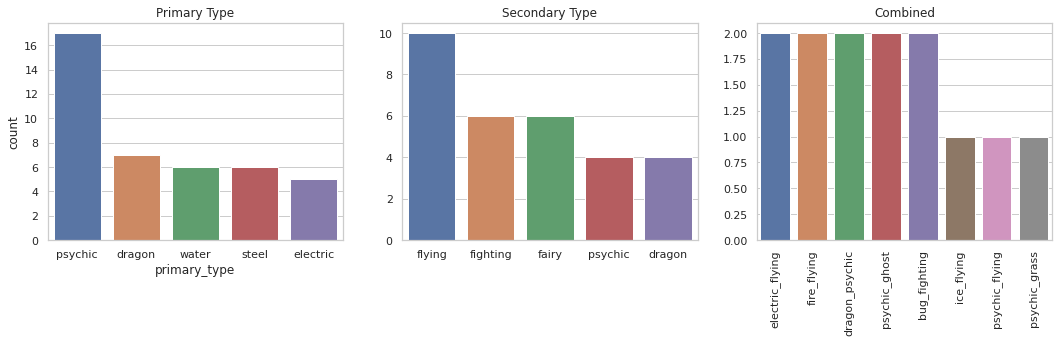

In [28]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
ax = sns.countplot(x = 'primary_type',data = legend,order = legend['primary_type'].value_counts().iloc[:5].index, ax=axes[0])
ax.set_title('Primary Type')

ax = sns.barplot(x=keys_sec_type[:5],y=values_sec_type[:5], ax=axes[1])
ax.set_title('Secondary Type')
    
ax = sns.barplot(x=keys_comb_type[:8],y=values_comb_type[:8], ax=axes[2])
ax.set_title('Combined')

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [31]:
classify_data= data[['attack','base_total','defense','hp','experience_growth','sp_attack','sp_defense','speed','total_ability','is_legendary']]
classify_data.head()

,attack,base_total,defense,hp,experience_growth,sp_attack,sp_defense,speed,total_ability,is_legendary
0,49,318,49,45,1059860,65,65,45,2,0
1,62,405,63,60,1059860,80,80,60,2,0
2,100,625,123,80,1059860,122,120,80,2,0
3,52,309,43,39,1059860,60,50,65,2,0
4,64,405,58,58,1059860,80,65,80,2,0


In [39]:
key_features = classify_data.drop('is_legendary', axis = 1)
target = classify_data['is_legendary']

X_train, X_test, Y_train, Y_test = train_test_split(key_features, target, test_size = 0.2, random_state = 0)

In [40]:
Gnb = GaussianNB()
Gnb.fit(X_train, Y_train)

Y_pred_Gnb = Gnb.predict(X_test)
score_Gnb = accuracy_score(Y_pred_Gnb,Y_test)*100
score_Gnb

91.30434782608695